## **Open-Source Language Models**




Spark NLP is a powerful library for **Natural Language Processing** (NLP) that integrates seamlessly with Apache Spark. It provides a wide range of capabilities, including:

- **Named Entity Recognition** (NER): Recognize and extract entities like names, organizations, locations, dates, and more from text.

- **Text Classification**: Classify text into predefined categories such as  sentiment analysis, and topic classification.

- **Translation**: Translate text between multiple languages.

- **Summarization**: Generate concise summaries from long documents.
    Suitable for creating abstracts and overviews.

- Visualization with **Spark NLP Display**: Visualize NLP results such as NER, dependency parsing, and more.
    Helps in explaining and understanding model outputs.

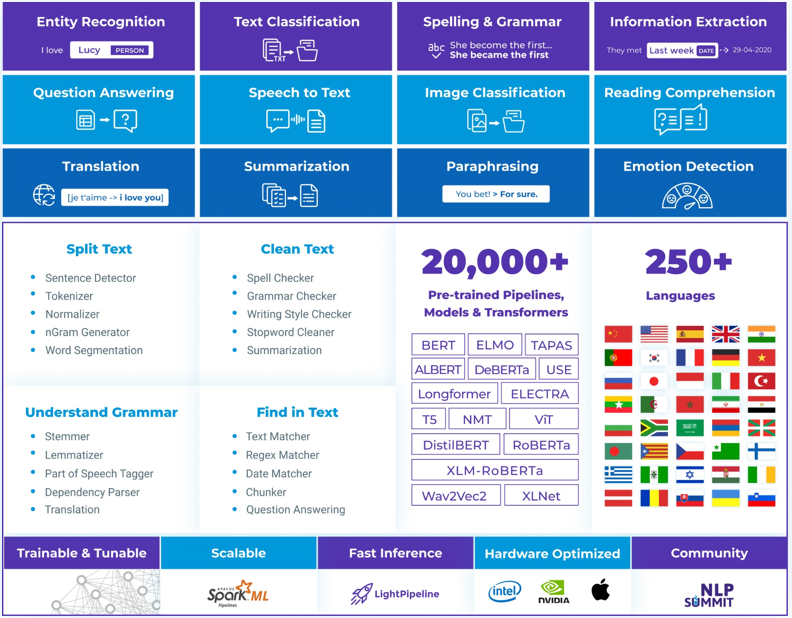

Please check our **UDEMY** courses covering all the details of the John Snow Labs Library:





[**Spark NLP for Data Scientists**](https://www.udemy.com/course/spark-nlp-for-data-scientists/)  


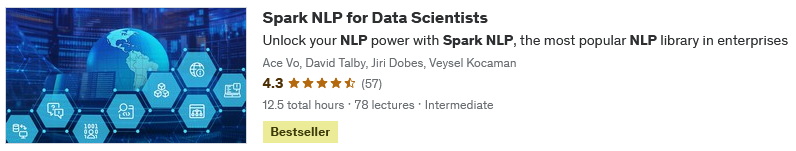

[**Healthcare NLP for Data Scientists**](https://www.udemy.com/course/healthcare-nlp-for-data-scientists/)

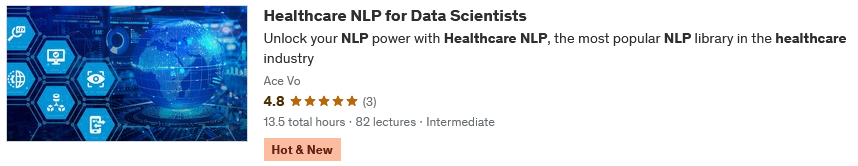

## **Setup and Import Libraries**

In [ ]:
!pip install --upgrade -q pyspark==3.4.1 spark-nlp
#!pip install -q pyspark==3.4.1 spark-nlp==5.3.2
!pip install -q spark-nlp-display

In [ ]:
import sparknlp

from sparknlp.base import *
from sparknlp.annotator import *

from pyspark.ml import Pipeline
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col

import pandas as pd

spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 5.4.0
Apache Spark version: 3.4.1


## **Pretrained Pipelines**

In Spark NLP,  **pretrained pipelines** are ready-to-use, end-to-end processing workflows that encompass a series of NLP tasks, bundled into a single, reusable unit.

These pipelines include pre-trained models and processing steps, allowing users to perform complex NLP tasks with minimal setup and coding effort.

Each pipeline consists of **multiple processing stages** that process text data sequentially. These stages may include tokenizers, sentence splitters,  embeddings, and more, depending on the specific tasks the pipeline is designed to perform.

Pretrained pipelines are designed to be **easily integrated** into applications. Users can load a pipeline with a single command and apply it to their text data without needing to configure individual components or train models.

Pipelines are designed to handle complete NLP workflows, **from raw text input to the final structured output**, covering all intermediate steps needed for the specific tasks.



In [ ]:
from sparknlp.pretrained import ResourceDownloader
ResourceDownloader.showPublicPipelines(lang="en")

+---------------------------------------------------------------------------------------------------------------+------+---------+
| Pipeline                                                                                                      | lang | version |
+---------------------------------------------------------------------------------------------------------------+------+---------+
| dependency_parse                                                                                              |  en  | 2.0.2   |
| check_spelling                                                                                                |  en  | 2.1.0   |
| match_datetime                                                                                                |  en  | 2.1.0   |
| match_pattern                                                                                                 |  en  | 2.1.0   |
| clean_pattern                                                                    

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline_dl = PretrainedPipeline('explain_document_dl', lang='en')

explain_document_dl download started this may take some time.
Approx size to download 168 MB
[OK!]


In [ ]:
sample_text = """
Sundar Pichai, the CEO of Google, recently met with Tim Cook, the CEO of Apple, at a technology conference in Silicon Valley.

The conference, organized by the Tech Innovators Association, took place at the San Jose Convention Center.

Both Google and Apple have been investing heavily in AI research, with projects ranging from smart home devices to autonomous vehicles.

After the conference, Pichai and Cook were spotted having dinner at a popular local restaurant, Le Papillon, sparking speculation about potential collaborations between the tech giants.
"""

In [ ]:
pipeline_dl.model.stages

[document_7939d5bf1083,
 SENTENCE_05265b07c745,
 REGEX_TOKENIZER_b3f969d18fa3,
 SPELL_e4ea67180337,
 LEMMATIZER_c62ad8f355f9,
 STEMMER_ba49f7631065,
 POS_d01c734956fe,
 WORD_EMBEDDINGS_MODEL_48cffc8b9a76,
 NerDLModel_d4424c9af5f4,
 NER_CONVERTER_a81db9af2d23]

In [ ]:
pipeline_dl.model.stages[-2].getClasses()

['O', 'B-ORG', 'B-LOC', 'B-PER', 'I-PER', 'I-ORG', 'B-MISC', 'I-LOC', 'I-MISC']

### Using **Light Pipeline**

- Optimized for single-machine, in-memory processing.

- Faster for small to medium datasets.

- Returns a list of dictionaries or pandas DataFrame.

- Useful for real-time predictions and prototyping.

#### Results by **annotate**

- Provides a **simplified output** with just the annotated results.

- Returns a dictionary where the keys are the names of the output columns (as defined in the pipeline) and the values are lists of strings containing the annotations.

- Useful when you only need the final results of the annotation **without any additional metadata**.



In [ ]:
result = pipeline_dl.annotate(sample_text)

In [ ]:
result.keys()

dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
result['entities']

['Sundar Pichai',
 'Google',
 'Tim Cook',
 'CEO of Apple',
 'Silicon Valley',
 'Tech Innovators Association',
 'San Jose Convention Center',
 'Google',
 'Apple',
 'Pichai',
 'Cook',
 'Le Papillon']

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 100)

df = pd.DataFrame({'token':result['token'],
                   'ner_label':result['ner'],
                   'spell_corrected':result['checked'],
                   'POS':result['pos'],
                   'lemmas':result['lemma'],
                   'stems':result['stem']})

df

,token,ner_label,spell_corrected,POS,lemmas,stems
0,Sundar,B-PER,Sunday,NNP,Sunday,sundai
1,Pichai,I-PER,Pichai,NNP,Pichai,pichai
2,",",O,",",",",",",","
3,the,O,the,DT,the,the
4,CEO,O,CEO,NNP,CEO,ceo
5,of,O,of,IN,of,of
6,Google,B-ORG,Google,NNP,Google,googl
7,",",O,",",",",",",","
8,recently,O,recently,RB,recently,recent
9,met,O,met,VBD,meet,met


#### **fullAnnotate**

- Provides a more **comprehensive output**, including both the annotations and the metadata for each token.

- Returns a list of dictionaries, where each dictionary contains **detailed information** about the annotations, including the tokens, entities, and other metadata such as the start and end positions of tokens.

- Useful when you need detailed information about the annotations, such as the positions of tokens in the original text, confidence scores, and other **metadata**.

In [ ]:
%%time

result = pipeline_dl.fullAnnotate(sample_text)

result[0]['entities']

CPU times: user 387 ms, sys: 150 ms, total: 537 ms
Wall time: 2.07 s


[Annotation(chunk, 1, 13, Sundar Pichai, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}, []),
 Annotation(chunk, 27, 32, Google, {'entity': 'ORG', 'sentence': '0', 'chunk': '1'}, []),
 Annotation(chunk, 53, 60, Tim Cook, {'entity': 'PER', 'sentence': '0', 'chunk': '2'}, []),
 Annotation(chunk, 67, 78, CEO of Apple, {'entity': 'ORG', 'sentence': '0', 'chunk': '3'}, []),
 Annotation(chunk, 111, 124, Silicon Valley, {'entity': 'LOC', 'sentence': '0', 'chunk': '4'}, []),
 Annotation(chunk, 161, 187, Tech Innovators Association, {'entity': 'ORG', 'sentence': '1', 'chunk': '5'}, []),
 Annotation(chunk, 208, 233, San Jose Convention Center, {'entity': 'LOC', 'sentence': '1', 'chunk': '6'}, []),
 Annotation(chunk, 242, 247, Google, {'entity': 'ORG', 'sentence': '2', 'chunk': '7'}, []),
 Annotation(chunk, 253, 257, Apple, {'entity': 'ORG', 'sentence': '2', 'chunk': '8'}, []),
 Annotation(chunk, 396, 401, Pichai, {'entity': 'PER', 'sentence': '3', 'chunk': '9'}, []),
 Annotation(chunk, 407, 41

In [ ]:
chunks=[]
entities=[]

for n in result[0]['entities']:
  chunks.append(n.result)
  entities.append(n.metadata['entity'])

df = pd.DataFrame({'chunks':chunks, 'entities':entities})
df

,chunks,entities
0,Sundar Pichai,PER
1,Google,ORG
2,Tim Cook,PER
3,CEO of Apple,ORG
4,Silicon Valley,LOC
5,Tech Innovators Association,ORG
6,San Jose Convention Center,LOC
7,Google,ORG
8,Apple,ORG
9,Pichai,PER


In [ ]:
tuples = []

for x,y,z in zip(result[0]["token"], result[0]["pos"], result[0]["ner"]):
  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end, y.result, z.result))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end','pos', 'ner'])

df.head(50)

,sent_id,token,start,end,pos,ner
0,0,Sundar,1,6,NNP,B-PER
1,0,Pichai,8,13,NNP,I-PER
2,0,",",14,14,",",O
3,0,the,16,18,DT,O
4,0,CEO,20,22,NNP,O
5,0,of,24,25,IN,O
6,0,Google,27,32,NNP,B-ORG
7,0,",",33,33,",",O
8,0,recently,35,42,RB,O
9,0,met,44,46,VBD,O


### Visualize the Results by **Spark NLP Display**

[**Spark NLP Display**](https://sparknlp.org/docs/en/display) is a utility in the Spark NLP library that provides visualization and debugging tools for NLP pipelines.

- Helps visualize the results of NLP annotations on text data.

- Shows detailed information about entities, relations, and other NLP features.

- Typically used after running a Spark NLP pipeline to inspect and validate results.

- Can generate HTML output for easy viewing in notebooks or browsers.


In [ ]:
from sparknlp_display import NerVisualizer

visualiser_2 = NerVisualizer()

visualiser_2.display(result[0], label_col='entities', document_col='document')

## **Pretrained Models**

Spark NLP provides a vast collection of **pretrained models** designed to perform various NLP tasks efficiently.

These models are trained on extensive datasets and fine-tuned to deliver high accuracy and performance.

- Time Efficient: Immediate access to models **without the need to train** them from scratch, significantly speeding up the development process.

- High Performance: Models are trained on large, diverse datasets and fine-tuned for optimal performance, ensuring **accurate** and robust results.

- Ease of Use: **Simple to integrate** and use with minimal configuration, making it accessible even for users with limited NLP expertise.

- Scalability: Optimized for distributed computing with Apache Spark, enabling efficient processing of **large volumes of data**.

- Language and Domain Variety: A wide range of models available for **250+ languages** and specific domains (e.g., healthcare, legal), catering to diverse NLP needs.

- Community and Support: Supported by an **active community** and extensive documentation, providing resources and assistance for best practices and troubleshooting.

Please visit [**Spark NLP Pretrained Models**](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/03.0.SparkNLP_Pretrained_Models.ipynb#scrollTo=RcOCaLKoIwow) notebook to get access to the details.

### **Named Entity Recognition (NER)**

Use [**ner_dl**](https://sparknlp.org/2020/03/19/ner_dl_en.html) model to extract basic entities from unstructured text and get the results in a structured form (dataframe).

In [ ]:
sample_data = spark.createDataFrame([[sample_text]]).toDF("text")

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# ner_dl model is trained with glove_100d. So we use the same embeddings in the pipeline
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d').\
    setInputCols(["document", 'token']).\
    setOutputCol("embeddings")

public_ner = NerDLModel.pretrained("ner_dl", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

public_ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(stages=[documentAssembler,
                               tokenizer,
                               glove_embeddings,
                               public_ner,
                               public_ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

result = nlpPipeline.fit(empty_data).transform(sample_data)

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
ner_dl download started this may take some time.
Approximate size to download 13.6 MB
[OK!]


#### Using **.transform()**

- Standard Spark NLP pipeline execution method.

- Suitable for large-scale data processing.

- Returns a Spark DataFrame.

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

+-----------+---------+
|      token|ner_label|
+-----------+---------+
|     Sundar|    B-PER|
|     Pichai|    I-PER|
|          ,|        O|
|        the|        O|
|        CEO|        O|
|         of|        O|
|     Google|    B-ORG|
|          ,|        O|
|   recently|        O|
|        met|        O|
|       with|        O|
|        Tim|    B-PER|
|       Cook|    I-PER|
|          ,|        O|
|        the|        O|
|        CEO|    B-ORG|
|         of|    I-ORG|
|      Apple|    I-ORG|
|          ,|        O|
|         at|        O|
|          a|        O|
| technology|        O|
| conference|        O|
|         in|        O|
|    Silicon|    B-LOC|
|     Valley|    I-LOC|
|          .|        O|
|        The|        O|
| conference|        O|
|          ,|        O|
|  organized|        O|
|         by|        O|
|        the|        O|
|       Tech|    B-ORG|
| Innovators|    I-ORG|
|Association|    I-ORG|
|          ,|        O|
|       took|        O|
|      place|   

In [ ]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result,
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label"),
              ).show(truncate=False)

+---------------------------+---------+
|chunk                      |ner_label|
+---------------------------+---------+
|Sundar Pichai              |PER      |
|Google                     |ORG      |
|Tim Cook                   |PER      |
|CEO of Apple               |ORG      |
|Silicon Valley             |LOC      |
|Tech Innovators Association|ORG      |
|San Jose Convention Center |ORG      |
|Both Google                |ORG      |
|Apple                      |ORG      |
|Pichai                     |PER      |
|Cook                       |PER      |
|Le Papillon                |ORG      |
+---------------------------+---------+



#### Using **Light Pipeline**

- Optimized for single-machine, in-memory processing.

- Faster for small to medium datasets.

- Returns a list of dictionaries or pandas DataFrame.

- Useful for real-time predictions and prototyping.

In [ ]:
# fullAnnotate in LightPipeline

model = nlpPipeline.fit(empty_data)

light_model = LightPipeline(model)

light_result = light_model.fullAnnotate(sample_text)


chunks = []
entities = []
sentence= []
begin = []
end = []
confidence = []

for n in light_result[0]['ner_chunk']:

    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity'])
    sentence.append(n.metadata['sentence'])

df_clinical = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end,
                   'sentence_id':sentence, 'entities':entities})

df_clinical.head(20)

,chunks,begin,end,sentence_id,entities
0,Sundar Pichai,1,13,0,PER
1,Google,27,32,0,ORG
2,Tim Cook,53,60,0,PER
3,CEO of Apple,67,78,0,ORG
4,Silicon Valley,111,124,0,LOC
5,Tech Innovators Association,161,187,0,ORG
6,San Jose Convention Center,208,233,0,ORG
7,Both Google,237,247,0,ORG
8,Apple,253,257,0,ORG
9,Pichai,396,401,0,PER


#### Visualize the Results by **Spark NLP Display**

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_result.html")

### **Text Classification**

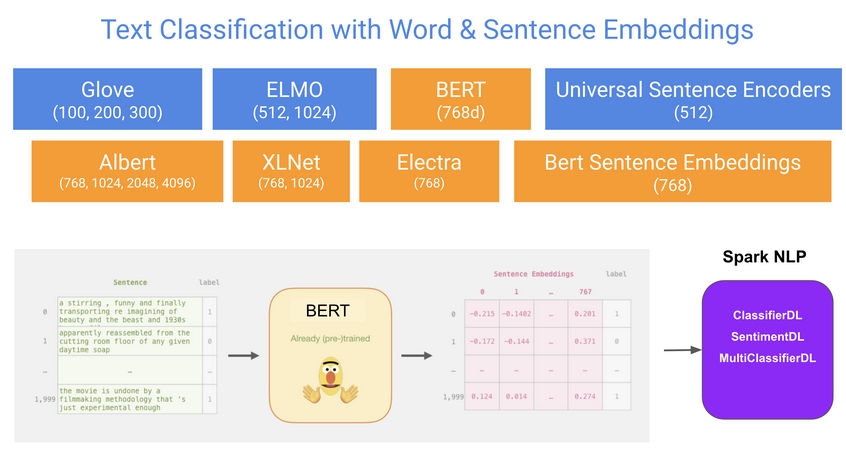

Spark NLP provides powerful capabilities for **text classification**, allowing users to categorize text data into predefined classes. This is useful for a wide range of applications, including sentiment analysis, spam detection, topic categorization, and more.

- Spark NLP offers **pretrained models** for various text classification tasks, enabling users to quickly implement classification without the need for extensive training.

- Users can **train their own text classification models** on custom datasets using Spark NLP's deep learning frameworks, including ClassifierDL, SentimentDL, and others.

- Supports both single-label classification, where each document belongs to one class, and **multi-label classification**, where each document can belong to multiple classes.

- Leveraging Apache Spark, Spark NLP can handle large-scale datasets efficiently, making it suitable for big data applications.



For more user experience and information, check out these notebooks :

- [Text_Classification_with_ClassifierDL](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.0.Text_Classification_with_ClassifierDL.ipynb)

- [SentimentDL_Train_Multiclass_Sentiment_Classifier](https://github.com/JohnSnowLabs/spark-nlp/blob/master/examples/python/training/english/classification/SentimentDL_train_multiclass_sentiment_classifier.ipynb)

- [MultiClassifierDL_Train_Multi_Label_Toxic_Classifier](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/MultiClassifierDL_train_multi_label_toxic_classifier.ipynb)

- [Text_Classification_Examples_in_SparkML_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.1.Text_Classification_Examples_in_SparkML_SparkNLP.ipynb)

- [Transformers_for_Sequence_Classification_in_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.2.Transformers_for_Sequence_Classification_in_SparkNLP.ipynb)

- [Multi_Lingual_Training_and_Models](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.3.Multi_Lingual_Training_and_Models.ipynb)

#### **Sentence Embeddings**

Sentence embeddings are crucial for **Text Classification** because they encode the semantic meaning of entire sentences into fixed-size vectors, allowing for consistent and efficient processing of variable-length inputs.

They capture contextual nuances, reduce dimensionality, and provide rich feature representations that enhance model performance.

**BertSentenceEmbeddings** are derived from the BERT (Bidirectional Encoder Representations from Transformers) model. They capture rich contextual information by considering **both the left and right** context of each word in a sentence, providing high-quality sentence-level representations.

**RoBertaSentenceEmbeddings** are based on the RoBERTa (Robustly optimized BERT approach) model, and these embeddings **improve on BERT** by using more data and training techniques.

**XlmRoBertaSentenceEmbeddings** come from the XLM-RoBERTa (Cross-lingual RoBERTa) model, which extends RoBERTa to handle **multiple languages**.

**E5Embeddings** are designed for efficient and effective sentence-level encoding. They focus on capturing the meaning of sentences and are optimized for performance in various NLP tasks.

**InstructorEmbeddings** provide contextual representations of sentences by leveraging instruction-following models. These embeddings are designed to understand and follow complex instructions, making them useful for tasks that require detailed and nuanced sentence understanding.

**BGEEmbeddings** - BGE (Bidirectional Generative Encoder) embeddings are specialized for generating high-quality sentence representations by encoding sentences bidirectionally. They are suitable for tasks that require deep semantic understanding of sentences.

**MPNetEmbeddings** - MPNet (Masked and Permuted Network) embeddings are designed to capture sentence-level semantics by utilizing both masked and permuted language modeling techniques.

**UAEEmbeddings** - UAE (Universal Action Encoder) embeddings are focused on encoding sentences with an emphasis on action-related semantics.

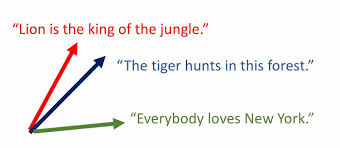

#### **ClassifierDL**

`ClassifierDL` is a deep learning-based text classification annotator in Spark NLP used for classifying texts into predefined categories.

Allows training of custom classification models on specific datasets, enabling fine-tuning for particular use cases and domains.

Compatible with **various pretrained word embeddings** like Word2Vec, GloVe, BERT, and others, enhancing the model's ability to understand and classify text accurately.



##### Use a **Pretrained Model**

[classifierdl_electra_questionpair](https://sparknlp.org/2021/08/13/classifierdl_electra_questionpair_en.html) identifies whether two question sentences are semantically repetitive or different.

In [ ]:
document = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")

embeddings = BertSentenceEmbeddings.pretrained("sent_electra_large_uncased", "en") \
.setInputCols("document") \
.setOutputCol("sentence_embeddings")

document_classifier = ClassifierDLModel.pretrained('classifierdl_electra_questionpair', 'en') \
.setInputCols(["sentence_embeddings"]) \
.setOutputCol("class")

nlpPipeline = Pipeline(stages=[document, embeddings, document_classifier])

sent_electra_large_uncased download started this may take some time.
Approximate size to download 1.2 GB
[OK!]
classifierdl_electra_questionpair download started this may take some time.
Approximate size to download 22.7 MB
[OK!]


In [ ]:
light_pipeline = LightPipeline(nlpPipeline.fit(spark.createDataFrame([['']]).toDF("text")))

result_1 = light_pipeline.annotate("q1: What is your favorite movie? q2: Which movie do you like most?")
print(result_1["class"])

['almost_same']


In [ ]:
result_2 = light_pipeline.annotate("q1: What is your favorite movie? q2: Which movie genre would you like to watch?")
print(result_2["class"])

['not_same']


##### **Train a Text Classification Model**

In [ ]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_test.csv

In [ ]:
trainDataset = spark.read \
      .option("header", True) \
      .csv("news_category_train.csv")

trainDataset.show(5, truncate=50)

+--------+--------------------------------------------------+
|category|                                       description|
+--------+--------------------------------------------------+
|Business| Short sellers, Wall Street's dwindling band of...|
|Business| Private investment firm Carlyle Group, which h...|
|Business| Soaring crude prices plus worries about the ec...|
|Business| Authorities have halted oil export flows from ...|
|Business| Tearaway world oil prices, toppling records an...|
+--------+--------------------------------------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col

def filter_category(dataset, category, num_samples):
    return dataset.filter(col("category") == category).limit(num_samples)

def sample_from_categories(dataset, categories, num_samples_per_category):
    sampled_datasets = []
    for category in categories:
        sampled_datasets.append(filter_category(dataset, category, num_samples_per_category))
    return sampled_datasets

In [ ]:
categories = ["World", "Sci/Tech", "Sports", "Business"]

num_samples_per_category = 1000
sampled_datasets = sample_from_categories(trainDataset, categories, num_samples_per_category)

trainDataset = sampled_datasets[0]
for i in range(1, len(sampled_datasets)):
    trainDataset = trainDataset.union(sampled_datasets[i])

In [ ]:
trainDataset.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|   World| 1000|
|Sci/Tech| 1000|
|  Sports| 1000|
|Business| 1000|
+--------+-----+



In [ ]:
testDataset = spark.read \
      .option("header", True) \
      .csv("news_category_test.csv")

testDataset.show(truncate=50)

+--------+--------------------------------------------------+
|category|                                       description|
+--------+--------------------------------------------------+
|Business|Unions representing workers at Turner   Newall ...|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers...|
|Sci/Tech| A company founded by a chemistry researcher at...|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts ...|
|Sci/Tech| Southern California's smog fighting agency wen...|
|Sci/Tech|"The British Department for Education and Skill...|
|Sci/Tech|"confessed author of the Netsky and Sasser viru...|
|Sci/Tech|\\FOAF/LOAF  and bloom filters have a lot of in...|
|Sci/Tech|"Wiltshire Police warns about ""phishing"" afte...|
|Sci/Tech|In its first two years, the UK's dedicated card...|
|Sci/Tech| A group of technology companies  including Tex...|
|Sci/Tech| Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday ...|
|Sci/Tech| Free Record Shop, a Dutch music  retail chain,...|
|Sci/Tec

In [ ]:
categories = ["World", "Sci/Tech", "Sports", "Business"]

num_test_samples_per_category = 250
test_datasets = sample_from_categories(testDataset, categories, num_test_samples_per_category)
testDataset = test_datasets[0]
for i in range(1, len(test_datasets)):
    testDataset = testDataset.union(test_datasets[i])

In [ ]:
testDataset.groupBy("category") \
      .count() \
      .orderBy(col("count").desc()) \
      .show()

+--------+-----+
|category|count|
+--------+-----+
|   World|  250|
|Sci/Tech|  250|
|  Sports|  250|
|Business|  250|
+--------+-----+



Train with **Bert Embeddings**

BERT (Bidirectional Encoder Representations from Transformers) embeddings are a type of deep contextualized word representation developed by Google.

Unlike traditional word embeddings, which assign a single vector to each word regardless of its context, BERT embeddings are dynamic and depend on the **entire sentence's context**, allowing the same word to have different representations in different contexts.

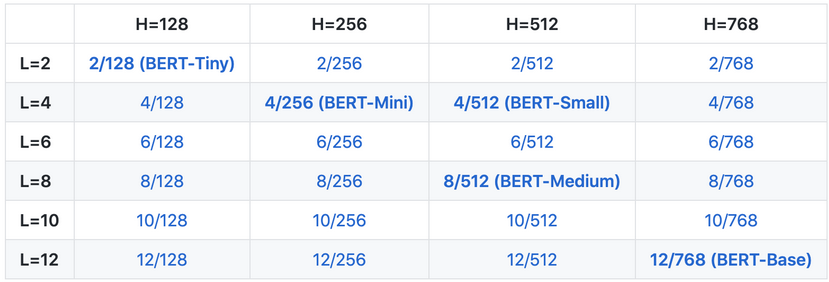

In [ ]:
document_assembler = DocumentAssembler() \
    .setInputCol("description") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

bert_embeddings = BertEmbeddings().pretrained(name='small_bert_L4_256', lang='en') \
    .setInputCols(["document",'token'])\
    .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")

classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("category")\
    .setMaxEpochs(10)\
    .setLr(0.001)\
    .setBatchSize(8)\
    .setEnableOutputLogs(True)
    #.setOutputLogsPath('logs')

bert_clf_pipeline = Pipeline(
    stages=[
        document_assembler,
        tokenizer,
        bert_embeddings,
        embeddingsSentence,
        classsifierdl
])

small_bert_L4_256 download started this may take some time.
Approximate size to download 40.5 MB
[OK!]


In [ ]:
%%time

bert_clf_pipelineModel = bert_clf_pipeline.fit(trainDataset)

CPU times: user 370 ms, sys: 59.1 ms, total: 429 ms
Wall time: 1min 1s


In [ ]:
# Evalute the performance of the model on the test dataset

from sklearn.metrics import classification_report

preds = bert_clf_pipelineModel.transform(testDataset)

preds_df = preds.select('category','description',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['category'], preds_df['result']))

              precision    recall  f1-score   support

    Business       0.80      0.71      0.75       250
    Sci/Tech       0.77      0.82      0.79       250
      Sports       0.88      0.95      0.92       250
       World       0.84      0.82      0.83       250

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



Train with **Universal Sentence Encoder**

The Universal Sentence Encoder, developed by Google Research, is a versatile tool in NLP that converts variable-length text into fixed-length embedding vectors.

This model can handle sentences, phrases, or short paragraphs in multiple languages, making it widely applicable for various NLP tasks such as semantic similarity analysis, text classification, and clustering.

In [ ]:
document = DocumentAssembler()\
    .setInputCol("description")\
    .setOutputCol("document")

# we can also use sentece detector here if we want to train on and get predictions for each sentence
use = UniversalSentenceEncoder.pretrained("tfhub_use_lg", "en") \
    .setInputCols("document") \
    .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("category")\
    .setMaxEpochs(3)\
    .setLr(0.001)\
    .setBatchSize(8)\
    .setEnableOutputLogs(True)

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
])

tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
[OK!]


In [ ]:
%%time
use_pipelineModel = use_clf_pipeline.fit(trainDataset)

CPU times: user 429 ms, sys: 49.6 ms, total: 478 ms
Wall time: 1min 15s


In [ ]:
from sklearn.metrics import classification_report

preds = use_pipelineModel.transform(testDataset)

preds_df = preds.select('category','description',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['category'], preds_df['result']))

              precision    recall  f1-score   support

    Business       0.83      0.84      0.84       250
    Sci/Tech       0.87      0.85      0.86       250
      Sports       0.91      0.98      0.95       250
       World       0.91      0.85      0.88       250

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



### **Translation**


Translation by Spark NLP iinvolves using models to automatically convert text from one language to another.

State-of-the-art models like **MarianMT** and **M2M100** enable high-quality translations across numerous language pairs.

These models are trained on large datasets and can handle complex linguistic structures, idioms, and context.

#### **MarianTransformer**: Fast Neural Machine Translation

Marian is an efficient, free Neural Machine Translation framework written in pure C++ with minimal dependencies.

It is currently the engine behind the Microsoft Translator Neural Machine Translation services and being deployed by many companies, organizations and research projects.

Note that this model only supports inputs up to 512 tokens. If you are working with longer inputs, consider splitting them first. For example, you can use the SentenceDetectorDL annotator to split longer texts into sentences.


The default model is `"opus_mt_en_fr"`, default language is `"xx"` (meaning multi-lingual), if no values are provided.
For available pretrained models please see the [Models Hub](https://nlp.johnsnowlabs.com/models?annotator=MarianTransformer).


[MarianNMT at Github Repo](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/20.0_Translations.ipynb#scrollTo=EbbuH3ozxYnr)

In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = SentenceDetectorDLModel.pretrained("sentence_detector_dl", "xx") \
    .setInputCols("document") \
    .setOutputCol("sentence")

marian = MarianTransformer.pretrained("opus_mt_en_fr","xx") \
    .setInputCols("sentence") \
    .setOutputCol("translation") \
    .setMaxInputLength(128)

pipeline = Pipeline() \
    .setStages([
        documentAssembler,
        sentence_detector,
        marian
    ])

In [ ]:
text = "What is the capital of France? We should know this in french."

data = spark.createDataFrame([[text]]).toDF("text")
result = pipeline.fit(data).transform(data)

result.selectExpr("sentence.result as sentence", "translation.result as translation").show(truncate=False)

+----------------------------------------------------------------+--------------------------------------------------------------------------+
|sentence                                                        |translation                                                               |
+----------------------------------------------------------------+--------------------------------------------------------------------------+
|[What is the capital of France?, We should know this in french.]|[Quelle est la capitale de la France ?, On devrait le savoir en français.]|
+----------------------------------------------------------------+--------------------------------------------------------------------------+



#### **M2M100Transformer**

**M2M100** is a state-of-the-art multilingual translation model developed by Facebook AI, designed to translate directly between 100 languages without relying on English as an intermediary.

This model supports over **10,000 language pairs** and is capable of high-quality translations across diverse languages, including many low-resource ones.

M2M100 uses a massive dataset and advanced neural architecture to handle **complex linguistic structures**, providing robust and accurate translations.

It is particularly useful for applications requiring **direct translations** between less common languages, making global communication and information access more seamless.

In [ ]:
source_language = "zh"
target_language = "en"

m2m100_transformer = M2M100Transformer.pretrained() \
    .setInputCols(["sentence"]) \
    .setMaxOutputLength(128) \
    .setOutputCol("generation") \
    .setSrcLang(source_language) \
    .setTgtLang(target_language)

pipeline_m2m = Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        m2m100_transformer
])

m2m100_418M download started this may take some time.
Approximate size to download 2.8 GB
[OK!]


In [ ]:
pipeline_model = pipeline_m2m.fit(spark.createDataFrame([[""]]).toDF('text'))
light_model = LightPipeline(pipeline_model)

In [ ]:
text = """除了是北方之王之外，约翰·斯诺还是一位英国医生，也是麻醉和医疗卫生发展的领导者。 他被认为是第一个利用数据治愈 1854 年霍乱爆发的人。"""

res = light_model.fullAnnotate(text)

In [ ]:
print ('Original:', text, '\n\n')

print ('Translated:\n')
for sentence in res[0]['generation']:
  print (sentence.result)

Original: 除了是北方之王之外，约翰·斯诺还是一位英国医生，也是麻醉和医疗卫生发展的领导者。 他被认为是第一个利用数据治愈 1854 年霍乱爆发的人。 


Translated:

In addition to being the King of the North, John Snow was also a British doctor and a leader in the development of anesthesia and health care. he was considered the first person to use data to cure the 1854 cholera outbreak.


### **Summarization**

**BART Transformer**, developed by Facebook AI, is a powerful model for text summarization.

BART produces high-quality summaries by **understanding context** and maintaining the essential information, making it ideal for applications like news summarization, report generation, and content summarization.


In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

# Can take in document or sentence columns
bart = BartTransformer.pretrained(name="distilbart_xsum_12_6",lang='en') \
    .setInputCols('document')\
    .setOutputCol("Bart")\
    .setMaxOutputLength(100)

# Build pipeline with BART
pipeline = Pipeline().setStages([
    documentAssembler,
    bart
])

distilbart_xsum_12_6 download started this may take some time.
Approximate size to download 699.7 MB
[OK!]


In [ ]:
# Set the task for questions on T5
bart.setTask('summarize')

BartTRANSFORMER_41525e20b6b3

In [ ]:
text = """(Reuters) - Mastercard Inc said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year, joining a string of big-ticket firms that have pledged similar support.

The credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin and would soon accept it as a form of payment.

Asset manager BlackRock Inc and payments companies Square and PayPal have also recently backed cryptocurrencies.

Mastercard already offers customers cards that allow people to transact using their cryptocurrencies, although without going through its network.

"Doing this work will create a lot more possibilities for shoppers and merchants, allowing them to transact in an entirely new form of payment. This change may open merchants up to new customers who are already flocking to digital assets," Mastercard said. (mstr.cd/3tLaPZM)

Mastercard specified that not all cryptocurrencies will be supported on its network, adding that many of the hundreds of digital assets in circulation still need to tighten their compliance measures.

Many cryptocurrencies have struggled to win the trust of mainstream investors and the general public due to their speculative nature and potential for money laundering.
"""

df=spark.createDataFrame([[text]]).toDF('text')

In [ ]:
annotated_df = pipeline.fit(df).transform(df)
annotated_df.select(['bart.result']).show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------+
|[The world’s largest credit - Mastercard giant Mastercard has announced it will begin to support for some of the digital currency.]|
+-----------------------------------------------------------------------------------------------------------------------------------+



In [ ]:
v = annotated_df.take(1)
print(f"Original Length {len(v[0].text)}   Summarized Length : {len(v[0].Bart[0].result)} ")

Original Length 1284   Summarized Length : 129 
